# Wprowadzenie do Pythona - Obsługa modułów

Główną siłą języka Python jest wsparcie ze strony modułów. Jak wspominałem w poprzednim dokumencie, moduły są zestawem narzędzi dostarczanym przez daną bibliotekę. Ponieważ naszym głównym celem jest zastąpienie w całości języka Logo językiem Python, nauczymy się teraz obsługi żółwia.


In [1]:
import turtle               # allows us to use the turtles library
# wn = turtle.Screen()        # creates a graphics window
alex = turtle.Turtle()      # create a turtle named alex
alex.forward(150)           # tell alex to move forward by 150 units
alex.left(90)               # turn by 90 degrees
alex.forward(75)            # complete the second side of a rectangle

Niestety Jupyter Notebook nie pozwala na wyświetlanie okna z żółwiem generowanego przez moduł **turtle**. Zatem aby zobaczyć jakikolwiek efekt naszej pracy nakażemy outputować wynik nie na ekran (Screen w kodzie), tylko do pliku graficznego.

In [1]:
import turtle

turtle.forward(100)
cv = turtle.getcanvas()
cv.postscript(file="file_name.ps", colormode='color')
turtle.done()

Tutaj drobna uwaga. Przez dłuższy czas usiłowałem znaleźć sposób aby Python automatycznie zapisywał obraz do png. Ostatecznie dałem za wygraną i pozwoliłem mu zapisywać w formie PostScript (format wymyślony przez firmę Adobe do przekazywania instrukcji drukarkom).

In [ ]:
# -*- coding: utf-8 -*-
#to w celu możliwości pisania komentarzy z polskimi znakami

import turtle as t #importujemy moduł turtle, ale będziemy odwoływać się do niego jako t
#from turtle import * #tutaj importowalibyśmy wszystkie funkcje z turtle i odwoływalibyśmy się do nich jak do
#własnych funkcji Pythona. Nie jest to zalecany proceder, może występować kolizja oznaczeń

def part1(x=8): #część pierwsza - pojedynczy listek. x=8 oznacza użycie parametru odległości, 
                #jeśli taki parametr nie zostanie podany, program automatycznie nada mu wartość 8
    t.penup() #podnoszę pisak
    t.forward(x) #poruszam się na przód
    t.pendown() #opuszczam pisak
    t.begin_fill() #coś nowego - informuję, że dla rysowanego teraz kształtu będę chciał mieć wypełnienie
    t.forward(4*x)
    t.left(60)
    t.forward(4*x)
    t.right(120)
    t.forward(4*x)
  
    for i in range(3):
        t.right(60)
        t.forward(4*x)
        
    t.end_fill() #wyłączam tryb wypełniania, wnętrze kształtu automatycznie wypełni się wybranym kolorem
    t.penup()
    t.left(60)
    t.forward(x)
    t.left(180)

def part2(x=8): #część druga - narysowanie sześciu kolejnych listków
    for i in range(6):
        part1(x)
        t.right(60)
    t.penup()

def part3(x=8): #część trzecia - narysowanie kwiata w centrum + sześciu kwiatów wokół
    t.left(30)
    part2(x)
    for i in range(6):
        t.penup()
        t.forward(19*x)
        part2(x)
        t.backward(19*x)
        t.left(60)

#komendy wykonywane w trakcie działania programu. Teraz mała notka - nic się nie stanie, gdy cały plik będzie
#wyglądał w ten sposób. W większych projektach stosujemy oznaczenie:
# if __name__ == "__main__":
#     something...
#takie oznaczenie pozwala Pythonowi przy czytaniu większego projektu znaleźć główną pętlę i ją wykonać. Tutaj
#nie musimy się tym martwić, cały skrypt zawarty jest w jednym małym pliku

t.hideturtle() #chowam żółwia, nie potrzebuję go widzieć
t.color("black", "yellow") #ustalam kolor pisaka na czarny, kolor wypełnienia na żółty
t.speed(0) #ustalam prędkość na maksymalną
part3() #wykonuję funkcję part3

#trochę bardziej skomplikowane. Moduł turtle współpracuje z modułem tkinter który odpowiada
#za generowanie grafiki w Pythonie. Aby zapisać jakikolwiek obraz narysowany przez żółwia muszę użyć zestawu
#poleceń - najpierw każę żółwiowi zwrócić dane na temat płótna (canvas) które narysował, potem outputuję
#to płótno w postaci pliku postscript
cv = t.getcanvas() 
cv.postscript(file="kwiat.ps", colormode='color')


## Spodziewany output:

![Kwiat](kwiat.png)

Przestawienie się z komend języka Logo na komendy Pythona (zwłaszcza, że Logo zostało spolszczone) może zająć trochę czasu, ale nie powinno nastręczać wielu trudności. Pełen spis jest na stronie: https://docs.python.org/2/library/turtle.html .

# Szyfry i szyfrogramy

Zajmiemy się teraz przykładowym zadaniem z 95'tego roku. Zadanie brzmi następująco:

Napisz procedurę ZAKODUJ :wyraz, której wywołanie koduje :wyraz według następującej reguły: litera a ma zostać zastąpiona przez literę z, litera b przez y, litera c przez x, ..., wreszcie litera z ma zostać zastąpiona przez literę a. Zakodowane mają być jedynie małe litery alfabetu łacińskiego, wszystkie inne znaki (w tym polskie litery mają zostać wypisane bez zmian. Oto przykładowe wyniki:

ZAKODUJ "abrakadabra 	powinno wypisać na ekranie słowo zyizpzwzyiz

ZAKODUJ "AlaMaKota 	powinno wypisać na ekranie słowo AozMzklgz

Będzie to doskonały przykład dla zastosowania list w Pythonie.

In [39]:
def zakoduj(wyraz):
    for w in wyraz:
        if ord(w) in range(ord('a'), ord('z')+1):
            x = ord(w) - ord('a')
            x = ord('z') - x
            print(chr(x), end="")
        else:
            print(w, end="")
zakoduj("AlaMaKota")

AozMzKlgz

## Tłumaczenie

Co tu się właściwie stało? Jak możesz wiedzieć, wiadomości tekstowe określane są nazwą **string**, jako "łańcuch znaków". W tym sensie zatem prosta wiadomość "hello" jest w zasadzie tablicą wartości typu char,  w postaci ['h', 'e', 'l', 'l', 'o']. Python rozróżnia typy "string" i "lista znaków", jednak pozwala wykonywać niektóre operacje na stringach tak jakbyśmy wykonywali je na liście.

In [17]:
x = "hello!"
print(x)
print(list(x))

hello!
['h', 'e', 'l', 'l', 'o', '!']


Kolejna rzecz. Powiedzmy, że chcemy sprawdzić czy podana liczba zawiera się w jakimś zakresie, np. od 0 do 128. Możemy oczywiście wykonywać tradycyjne sprawdzanie "jeśli liczba jest mniejsza niż zero lub większa niż 128", co jednak nie jest doskonałe - jeśli dany zbiór liczb jest nietrywialny - np. wszystkie liczby parzyste podzielne przez 3 oraz podzielne przez 7, mniejsze od 1000, dane jakąś tablicą - to zadanie się komplikuje. Możemy oczywiście nakazać żmudne sprawdzanie: "dla wszystkich elementów tablicy sprawdź czy istnieje taki element który jest równy x. Jeśli nie, zwróć fałsz. Jeśli tak, przerwij sprawdzanie i zwróć prawdę".

In [30]:
tab = []
for i in range(0,1000):
    if i%2 == 0 and i%3 == 0 and i%7 == 0:
        tab.append(i) #tworzenie tablicy
        
print("Zbiór liczb:", tab)
        
x = input("Podaj liczbę: ")
x = int(x) #jak myślisz, dlaczego wykonuję rzutowanie?

flag = True
for i in tab:
    if x==i:
        print("Liczba zawiera się w zbiorze!")
        flag = False

if flag == True:
    print("Liczba nie zawiera się w zbiorze")
    

Zbiór liczb: [0, 42, 84, 126, 168, 210, 252, 294, 336, 378, 420, 462, 504, 546, 588, 630, 672, 714, 756, 798, 840, 882, 924, 966]
Podaj liczbę: 10
Liczba nie zawiera się w zbiorze


Będzie to rozwiązanie żmudne i nieeleganckie, niemniej będzie działać. Teraz pokażę Ci trick, który pozwala na znacznie szybsze sprawdzanie poprawności. Będę tu już korzystał ze zdefiniowanej powyżej listy liczb **tab**, dlatego nie napiszę ponownie całej definicji:

In [29]:
x = input("Podaj liczbę: ")
x = int(x)

print("Zbiór liczb:", tab)

if x in tab:
    print("Liczba zawiera się w zbiorze!")
else:
    print("Liczba nie zawiera się w zbiorze!")

Podaj liczbę: 42
Zbiór liczb: [0, 42, 84, 126, 168, 210, 252, 294, 336, 378, 420, 462, 504, 546, 588, 630, 672, 714, 756, 798, 840, 882, 924, 966]
Liczba zawiera się w zbiorze!


W istocie Python wykonuje dokładnie te same operacje co wcześniej, być może tylko szybciej, bo zamiast wykonywać powoli swoje pętle, wysyła dane do wewnętrznych funkcji skompilowanych w Fortranie albo C. Jest to zresztą siła Pythona - mnóstwo małych, przydatnych narzędzi pozwalających na szybszy zapis rutynowych działań.

Co się zatem dzieje w naszej funkcji zakoduj? Dla przypomnienia napiszę ją jeszcze raz:

In [40]:
def zakoduj(wyraz):
    for w in wyraz:
        if ord(w) in range(ord('a'), ord('z')+1):
            x = ord(w) - ord('a')
            x = ord('z') - x
            print(chr(x), end="")
        else:
            print(w, end="")

Funkcja przyjmuje zmienną wyraz, w domyśle ma to być łańcuch znaków. Dla każdego elementu tego łańcucha przeprowadzamy następującą operację: jeśli znak należy do jakiegoś zakresu, jest drukowany, w przeciwnym razie idziemy dalej.

Teraz pytanie czym jest ord(x). Otóż, znaki alfanumeryczne mają jakieś swoje miejsce na tablicy ASCII, ale jeśli chcemy ich używać jako liczb, musimy Pythonowi dać to do zrozumienia. Tłumaczenie danej litery na jej położenie w tablicy ASCII wykonuje się właśnie za pomocą funkcji **ord**:

In [41]:
for a in "abcdefghijklmnoprstuwxyz":
    x = ord(a)
    print(x, end=" ")

97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 114 115 116 117 119 120 121 122 

Odwrotnie, jeśli chcemy reprezentację liczbową przetłumaczyć na znak, stosujemy funkcję **chr**. W ten sposób możemy wykonywać przesunięcia i podstawienia na znakach, jak w Szyfrze Cezara:

In [42]:
for a in "abcdefghijklmnoprstuwxyz":
    x = ord(a)
    y = chr(x)
    print(y,x)

a 97
b 98
c 99
d 100
e 101
f 102
g 103
h 104
i 105
j 106
k 107
l 108
m 109
n 110
o 111
p 112
r 114
s 115
t 116
u 117
w 119
x 120
y 121
z 122


Tutaj przy okazji warto wspomnieć o samym formacie tablicy ASCII (American Standard Code for Information Interchange). Tablica ściągnięta z www.asciitable.com ma postać:

![ascii1](asciifull.png)
![ascii2](extend.png)

ASCII jest coraz mniej stosowane do przesyłania danych i formatu zapisu dokumentów - zauważ, że np. nie daje zupełnie możliwości stosowania polskich znaków. Taką możliwość daje natomiast Unicode i jeden z jego systemów kodowania, UTF-8. Jednak ceną za te możliwości jest zwiększony rozmiar każdego pojedynczego znaku.

Wracając - powiedzmy, że chcemy teraz wykonać operację zastąpienia każdego ze znaków literą z drugiego końca alfabetu - czyli dla 'a' dostać 'z', dla 'b' dostać 'y' i tak dalej. Jak się do tego zabrać? Znacznie prościej jest operować na wartościach liczbowych tychże liter - jeśli 'a' ma wartość 97 (...albo po prostu - **ord('a')** ) a 'z' ma wartość 122, operacja zastąpienia będzie wygladać następująco:

In [43]:
x = 122 - (x-97)

albo, jeśli nie jesteśmy pewni wartości liczbowych (i chcemy uczynić kod bardziej zrozumiałym):

In [45]:
x = ord('z') - (x - ord('a'))

# Korzystanie z pakietów NumPy i Matplotlib

Olbrzymią siłą Pythona są pakiety obliczeń na macierzach i wizualizacja danych. NumPy dostarcza kolejną formę zapisu ciągów zmiennych - podobną do **list**, ale inną - pozwalając jednocześnie na zbiorcze operacje na całych wielkich tablicach. Ta możliwość jest nie do przecenienia. Dla przykładu - chcemy mieć pierwsze 100 kwadratów liczb. Dla normalnej struktury **list** musielibyśmy zrobić:

In [89]:
tab = [i**2 for i in range(100)]
print(tab)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]


Natomiast w NumPy:

In [88]:
import numpy as np
tab = np.arange(100)**2
print(tab)

[   0    1    4    9   16   25   36   49   64   81  100  121  144  169  196
  225  256  289  324  361  400  441  484  529  576  625  676  729  784  841
  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681 1764 1849 1936
 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025 3136 3249 3364 3481
 3600 3721 3844 3969 4096 4225 4356 4489 4624 4761 4900 5041 5184 5329 5476
 5625 5776 5929 6084 6241 6400 6561 6724 6889 7056 7225 7396 7569 7744 7921
 8100 8281 8464 8649 8836 9025 9216 9409 9604 9801]


Dalej - chcelibyśmy mieć resztę z dzielenia przez 7 dla każdej z nich? Wykonujemy:

In [52]:
tab = tab%7
print(tab)

[0 2 4 6 1 3 5 0 2 4 6 1 3 5 0 2 4 6 1 3 5 0 2 4 6 1 3 5 0 2 4 6 1 3 5 0 2
 4 6 1 3 5 0 2 4 6 1 3 5 0 2 4 6 1 3 5 0 2 4 6 1 3 5 0 2 4 6 1 3 5 0 2 4 6
 1 3 5 0 2 4 6 1 3 5 0 2 4 6 1 3 5 0 2 4 6 1 3 5 0 2]


Jak widać, możemy w ten sposób znacznie skrócić sobie czas zapisu. Teraz powiedzmy, że chcemy narysować wykres funkcji za pomocą biblioteki **Matplotlib**.

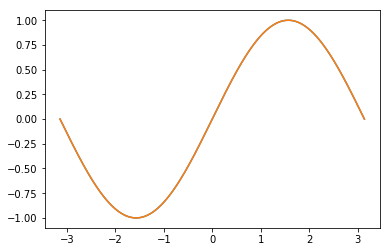

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 1024) #przedział od -pi do pi z gęstością 1024 punktów
y = np.sin(x) #y jest funkcją x

plt.plot(x, y)
plt.show()

Oczywiście nie musieliśmy nawet używać pakietu NumPy. Przy użyciu standardowych metod Pythona ( + Matplotlib) wyglądałoby to następująco:

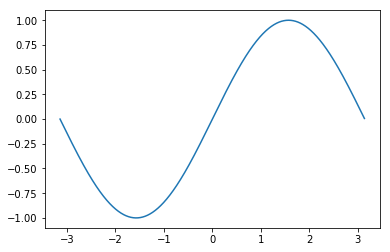

In [63]:
import matplotlib.pyplot as plt
from math import sin, pi

N = 1024
x = [pi * (x-N/2)/N*2 for x in range(N)]
y = [sin(y) for y in x]

plt.plot(x,y)
plt.show()

Jak widać, NumPy pozwala na uzyskanie znacznie większej przejrzystości kodu. Gdybyśmy zamiast funkcji jednowymiarowej mieli wielowymiarową, kod Pythona byłby coraz mniej czytelny. W przypadku NumPy mamy nadal wysoką przejrzystość:

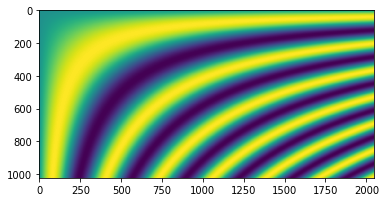

In [70]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0,2*np.pi,2048)
Y = np.linspace(0,2*np.pi,1024)

Z = np.array([[x*y for x in X] for y in Y])

F = np.sin(Z)

plt.imshow(F)
plt.show()

W tym wypadku wykonaliśmy kolejny trick pozwalający na uzyskanie konkretnego wyniku. Otóż - chciałem uzyskać tablicę dwuwymiarową iloczynów $x\cdot y$. Do tego stworzyłem dwuwymiarową listę - czyli listę list w których elementy są iloczynami każdej z list z osobna. W ten sposób uzyskaliśmy:

In [82]:
X = range(5)
Y = range(4)

Z  = [[x*y for x in X] for y in Y]

print(Z)

[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4], [0, 2, 4, 6, 8], [0, 3, 6, 9, 12]]


Aby nie odchodzić od używania pakietu NumPy, od razu tworzę ze zmiennej $Z$ macierz typu np.array. Równie dobrze mógłbym jako argument dla funkcji **np.sin** dać samą listę list $Z$ i pozwolić funkcji $\sin$ samodzielnie wykonać przekształcenie. Tak czy inaczej, efekt jest identyczny. W dodatku, o ile:

In [83]:
np.sin(Z)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [ 0.        ,  0.90929743, -0.7568025 , -0.2794155 ,  0.98935825],
       [ 0.        ,  0.14112001, -0.2794155 ,  0.41211849, -0.53657292]])

Jest wykonywane, o tyle bardziej zaawansowane działanie (np. kwadrat, $(xy)^2$) byłoby już nieosiągalne:

In [86]:
np.sin(Z)
np.sin(Z**2)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [87]:
Z = np.array(Z)
np.sin(Z)
np.sin(Z**2)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.84147098, -0.7568025 ,  0.41211849, -0.28790332],
       [ 0.        , -0.7568025 , -0.28790332, -0.99177885,  0.92002604],
       [ 0.        ,  0.41211849, -0.99177885, -0.62988799, -0.49102159]])

Ostatnia rzecz. Powiedzmy, że chcemy wykonać skomplikowane obliczenia numeryczne na całej tablicy, z dodatkowym warunkiem, że jeśli liczba przekroczy jakiś zakres, to przestaje być przekształcana dalej. W ten sposób wyznacza się punkty należące do **zbioru Mandelbrota**, pierwszego odkrytego fraktala:

![Mandelbrot](m3.jpg)

Sposób uzyskiwania zbioru jest następujący: każdy punkt w przestrzeni reprezentowany jest przez dwie liczby, które można zapisać w postaci pary $(x,y)$, albo jako **liczbę zespoloną** : $x+\text iy$. Dla każdego punktu przestrzeni (nazywanego $p$) sprawdzamy, czy dane przekształcenie:

$$z\mapsto z^2 + p$$

po wystarczająco dużej liczbie powtórzeń (idealnie przy nieskończonej) ucieka w nieskończoność, czy nie.

Jeśli $z$ przekroczy dozwoloną wartość (np. 10), obliczenia powinny być skończone dla tego punktu. W przeciwnym wypadku obliczenia powinny być prowadzone dalej.

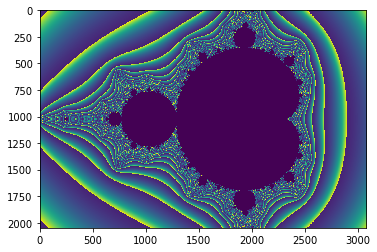

In [100]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([[x + 1j*y for x in np.linspace(-2,1,3*1024)] for y in np.linspace(-1,1,2*1024)])

Z = np.zeros_like(P)
for i in range(100):
    mask = np.abs(Z)<10
    
    Z[mask] = Z[mask]**2 + P[mask]

Z[np.abs(Z)<1]=0
    
plt.imshow(np.abs(Z))
plt.show()